Описание на проект по ML с Python (зимен семестър 2023/2024) <br/>
Роберт Борисов 62529, Владимир Радев 62530 <br/>
Софтуерно инженерство,4 курс

**1.Тип на проекта и кратко описание**

**Име на проект**: Клъстеризация на ползватели на кредитни карти<br/>
Нашият проект има за цел да клъстеризира ползвателите на кредитни карти, като за целта ще използва dataset,който обобщава начина на използване на около 9000 активни кредитни карти през последните 6 месеца

**2.Кратко описание на данните**</br>
Работим с dataset, взет от kaggle, който има 8950 реда и 18 колони.

DETAILS OF DATASET

1) CUSTID : Identification number of credit card holder

2) BALANCE : Balancing amount left in customer's account

3) BALANCE_FREQUENCY : Frequency of updating balance in account . Score in between 0 and 1 . (0 : not updated frequently and 1 : updated frequently)

4) PURCHASES : Amount of purchases made

5) ONEOFFPURCHASES : Maximum purchases in one go

6) INSTALLMENTS_PURCHASES : Amount of purchase done in one installments

7) CASH_ADVANCE : Cash payments made in advance by the customer

8) PURCHASES_FREQUENCY : Frequency of making purchases .(0 : no purchases and 1 : maximum purchases)

9) ONEOFF_PURCHASES_FREQUENCY : Tells how frequently the purchases are made in one go . (0 : no purchases in one go and 1 : maximum purchases in one go)

10) PURCHASES_INSTALLMENTS_FREQUENCY : frequency of making purchases with installments

11) CASH_ADVANCE_FREQUENCY : frequency of making cash payments in advance

12) CASH_ADVANCE_TRX : number of transactions made with providing cash in advanced

13) PURCHASES_TRX : number of purchases made in transactions

14) CREDIT_LIMIT : limit of the credit card user

15) PAYMENTS : amount of payment made by user

16) MINIMUM_PAYMENTS : least amount of payment made by the user

17) PRC_FULL_PAYMENT : Percentage of credit card payments made by the use in full amount

18) TENURE : time period for user's credit card service **

In [1]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv("./credit_cards.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Нека сега разгледаме дали има NAN стойности, и ако има такива какъв процент са те

In [7]:
new_data = data.isnull().sum().sort_values(ascending=False)
perc_data = (data.isnull().sum()*100/data.shape[0]).sort_values(ascending=False)
data_perc = pd.concat([new_data,perc_data],axis=1).set_axis(["Nan","%"],axis=1)
data_perc

,Nan,%
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


Можем да видим че имаме 313 липсващи стойности за **"Minimum Payments"**, което е около 3.5 процента от всички стойности.Също така можем да забележим,че имаме само 1 липсваща стойност за **"Credit Limit"**

In [8]:
print(data.shape[0])
data_types = pd.DataFrame(data.dtypes,columns=["DataType"])
data_types["Unique Values"]=data.nunique()
print(data_types)
data_types.loc[data_types["Unique Values"] == data.shape[0]]

8950
                                 DataType  Unique Values
CUST_ID                            object           8950
BALANCE                           float64           8871
BALANCE_FREQUENCY                 float64             43
PURCHASES                         float64           6203
ONEOFF_PURCHASES                  float64           4014
INSTALLMENTS_PURCHASES            float64           4452
CASH_ADVANCE                      float64           4323
PURCHASES_FREQUENCY               float64             47
ONEOFF_PURCHASES_FREQUENCY        float64             47
PURCHASES_INSTALLMENTS_FREQUENCY  float64             47
CASH_ADVANCE_FREQUENCY            float64             54
CASH_ADVANCE_TRX                    int64             65
PURCHASES_TRX                       int64            173
CREDIT_LIMIT                      float64            205
PAYMENTS                          float64           8711
MINIMUM_PAYMENTS                  float64           8636
PRC_FULL_PAYMENT          

,DataType,Unique Values
CUST_ID,object,8950


Както можем да видим има една колона -  **CUST_ID**,която  има 8950 уникални стойности,точно толкова колкото са и редовете в нашия dataset.Следва да премахнем тази колона.

In [9]:
data.drop(columns=["CUST_ID"],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

За колоните **MINIMUM_PAYMENTS** и **CREDIT_LIMIT** и липсващите данни в нея ще използваме KNN Imputer,който ще запълни липсващите стойности с средното на n-те най-близки съседа до примера с липсващатите стойности.

In [10]:
from sklearn.impute import KNNImputer
columns_with_nulls = data.columns[data.isnull().any()].tolist()
imp = KNNImputer()
data_imp = pd.DataFrame(imp.fit_transform(data[columns_with_nulls]),columns=columns_with_nulls)
data.fillna(data_imp,inplace=True)
print(data[columns_with_nulls].isnull().sum())
print(data.info())

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TR

Сега нека проверим разпределението на стойностите по колони

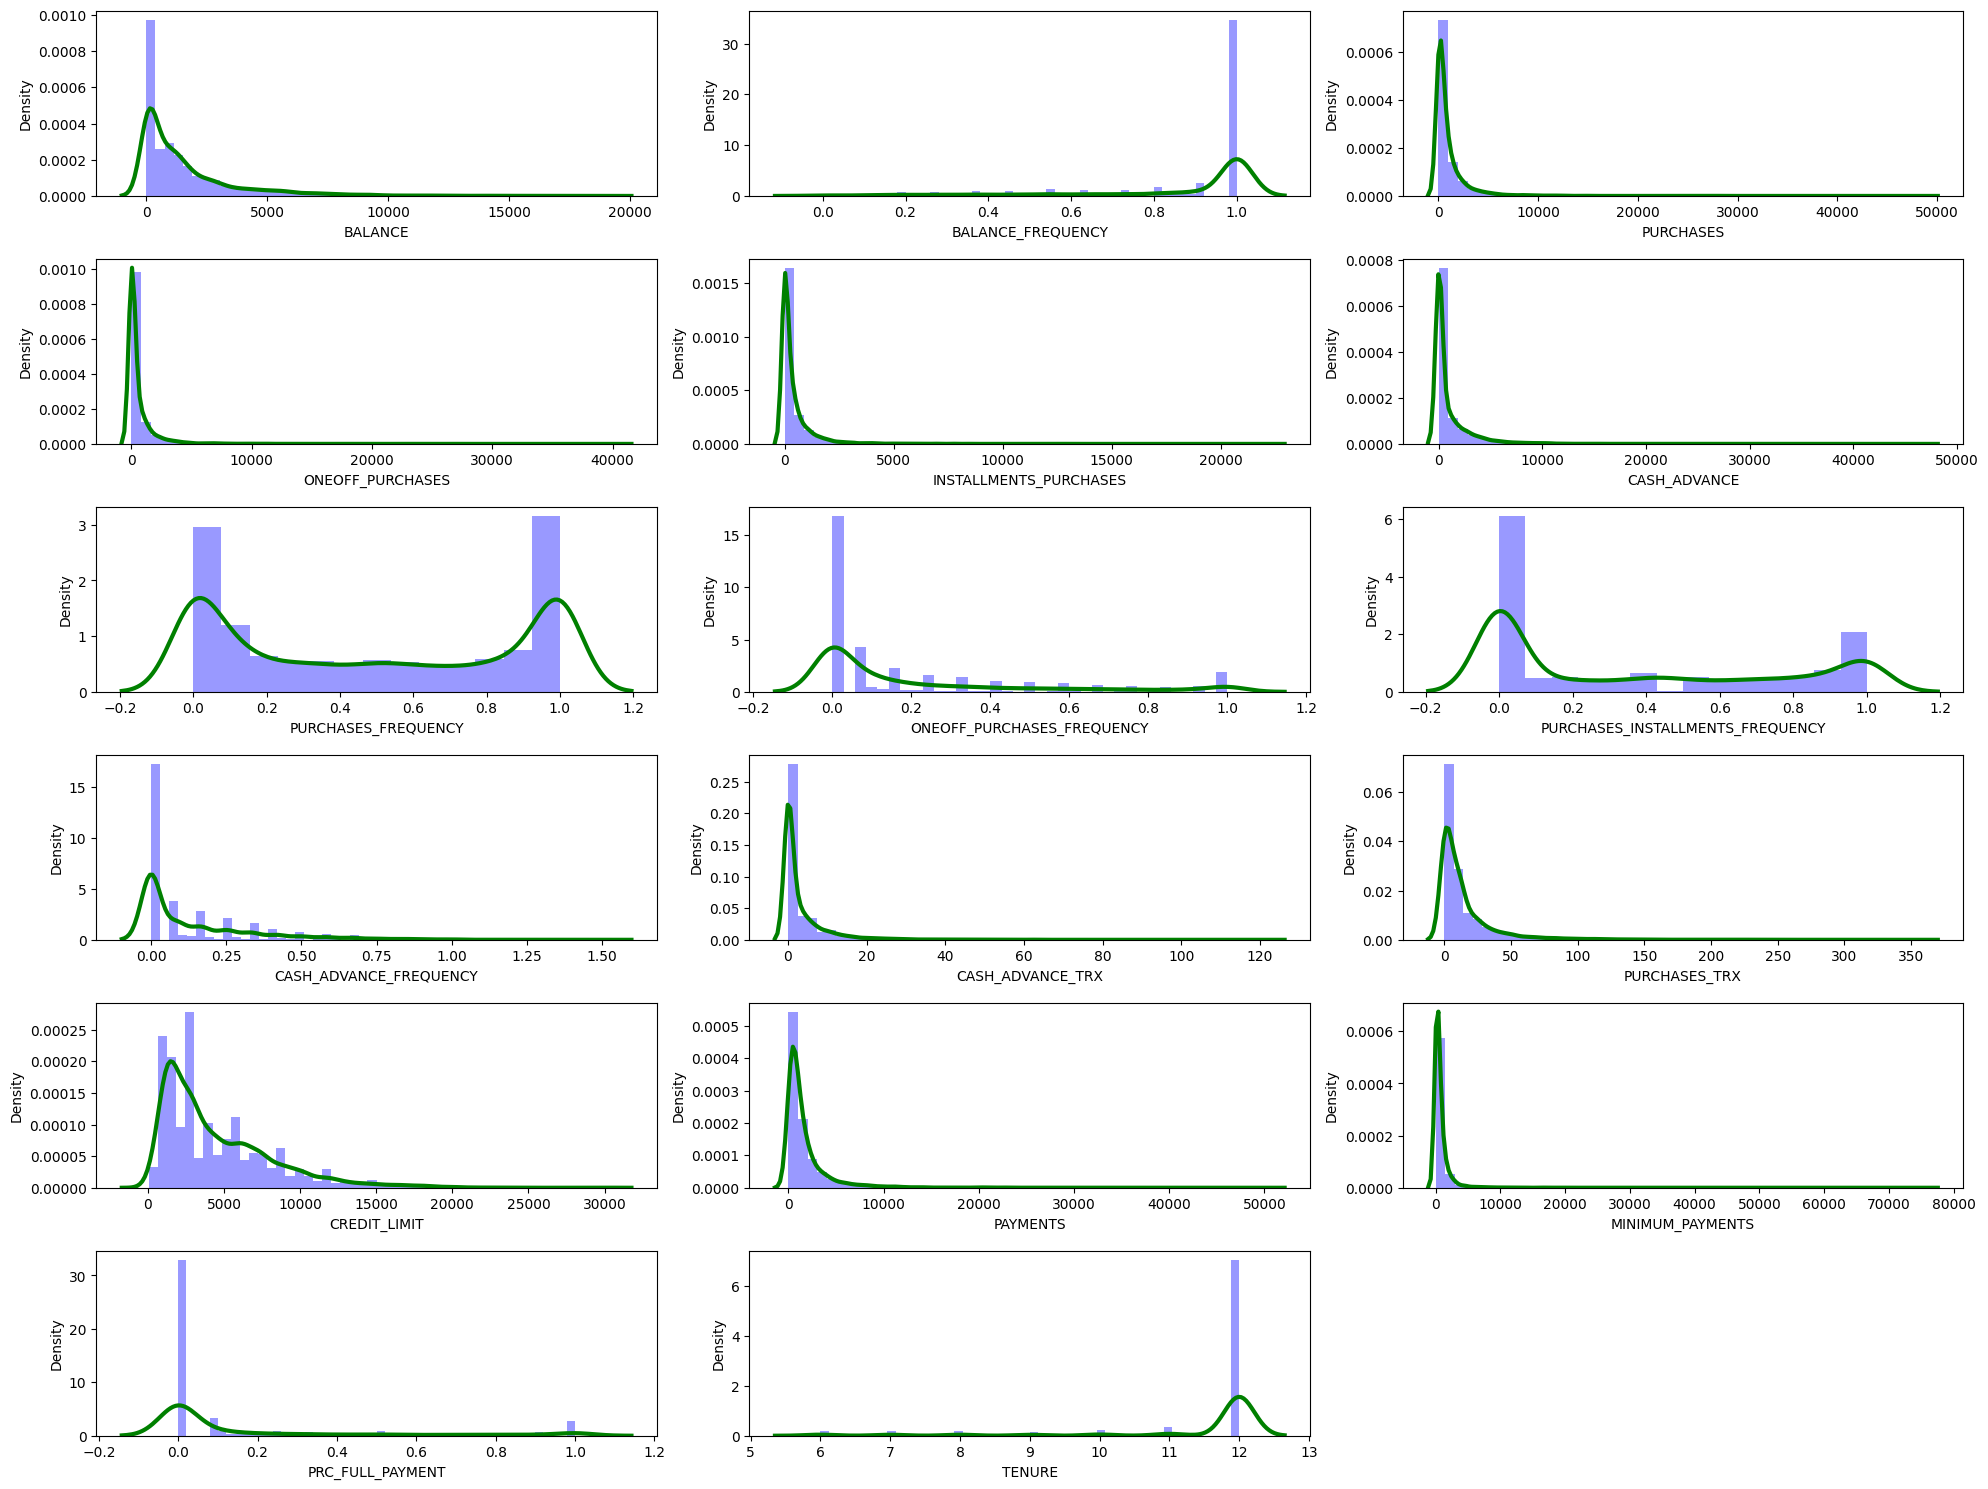

In [11]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize=(20,15))
for i in range(len(data.columns)):
    plt.subplot(6,3,i+1)

    sns.distplot(data[data.columns[i]], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})

plt.tight_layout()
plt.show()

От визуализациите на данните можем да забележим,че данните не са никак равномерно разпределени.Единствената колона, която е разпределена горе-долу равномерно е **PURCHASE_FREQUENCY**.Голяма част от данните при **BALANCE**,**PURCHASES**,**ONEOFF_PURCHASES**,**INSTALLMENT_PURCHASES**,**CASH_ADVANCE**,**CASH_ADVANCE_FREQUENCY**,**PURCHASE_TRX**,**PAYMENTS**,**MINIMUM_PAYMENTS**,**PRC_FULL_PAYMENT** са концентрирани в или около нулата.Както можем да видим от графиките, повечето от данните са *right skewed* или с други думи такива, които имат дълга опашка надясно.Изключение правят **TENURE** и **BALANCE_FREQUENCY**, който са *left skewed*

Нека сега видим колоните които индикират някаква честота

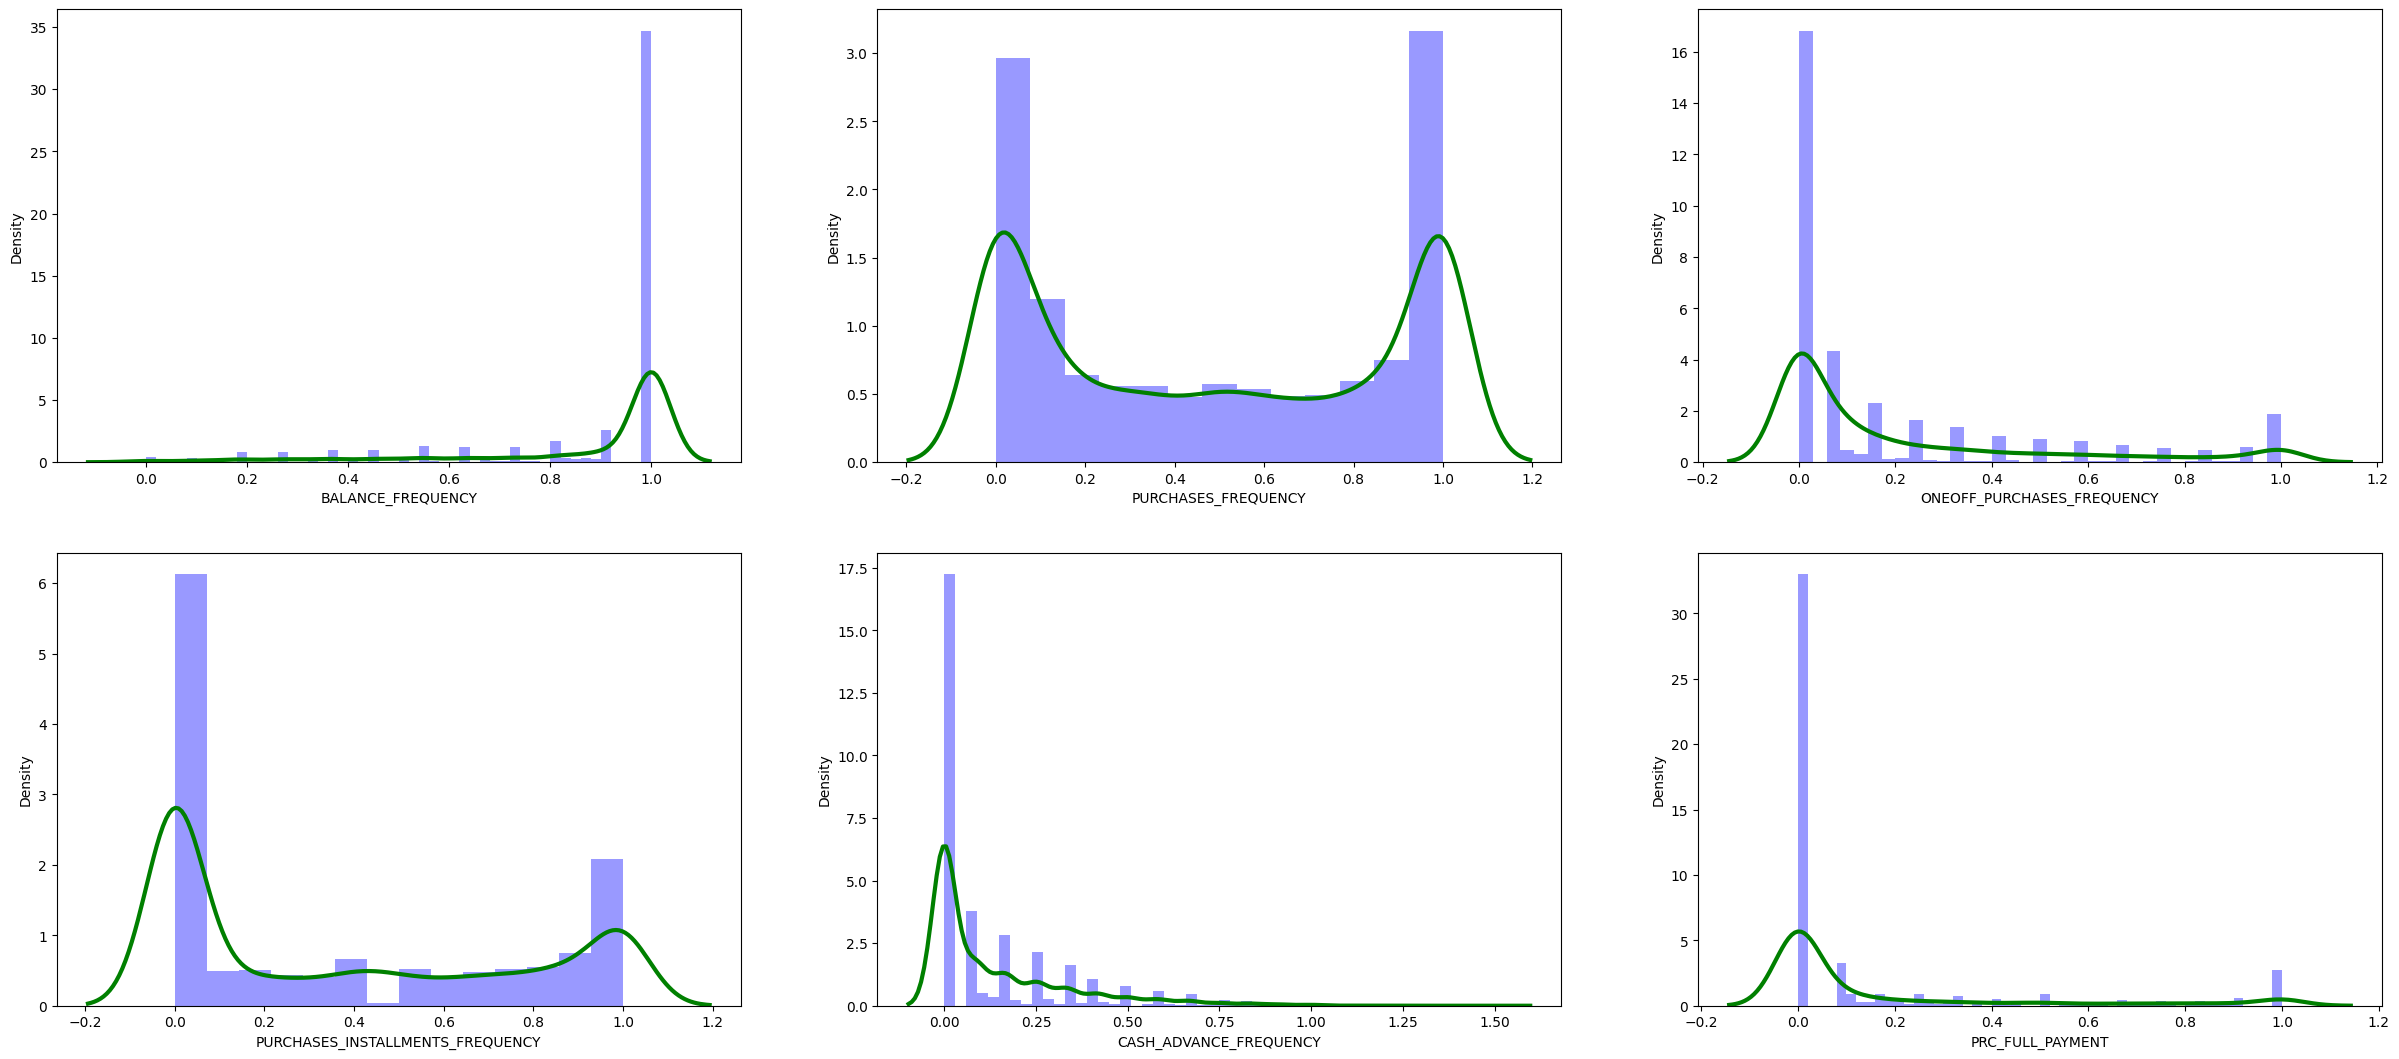

In [12]:
frequance_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(data[frequance_columns]):

        ax = plt.subplot(3, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

От графиките виждаме че повечето са концетрирани в 0-та, освен **BALANCE_FREQUENCY**,който е концетриран в 1-цата и **PURCHASES_FREQUENCY**,чиито стойности са разпределни между 0 и 1

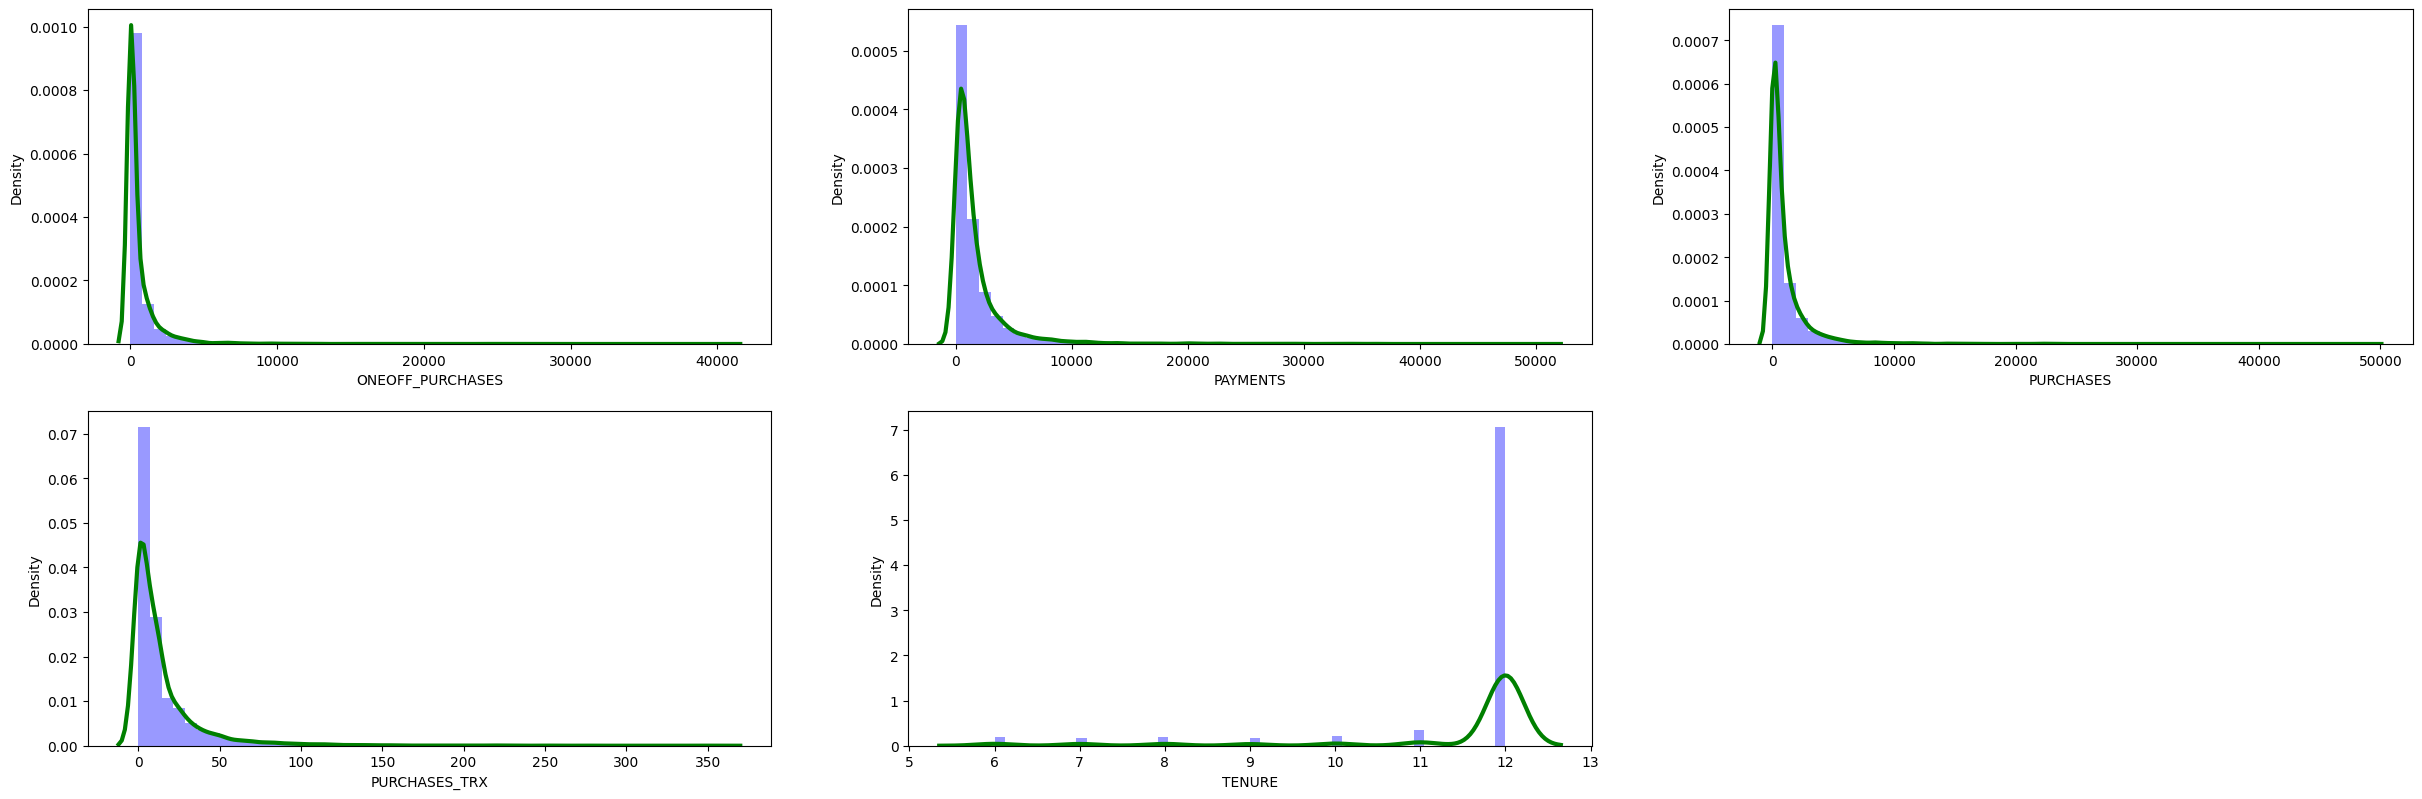

In [13]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(frequance_columns)[6:]):
        ax = plt.subplot(4, 3, i+1)
        sns.distplot(data[col], kde_kws={'color': 'g', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
        plt.xlabel(col)
        
plt.show()

Неке сега да разгледаме корелацията

<Axes: >

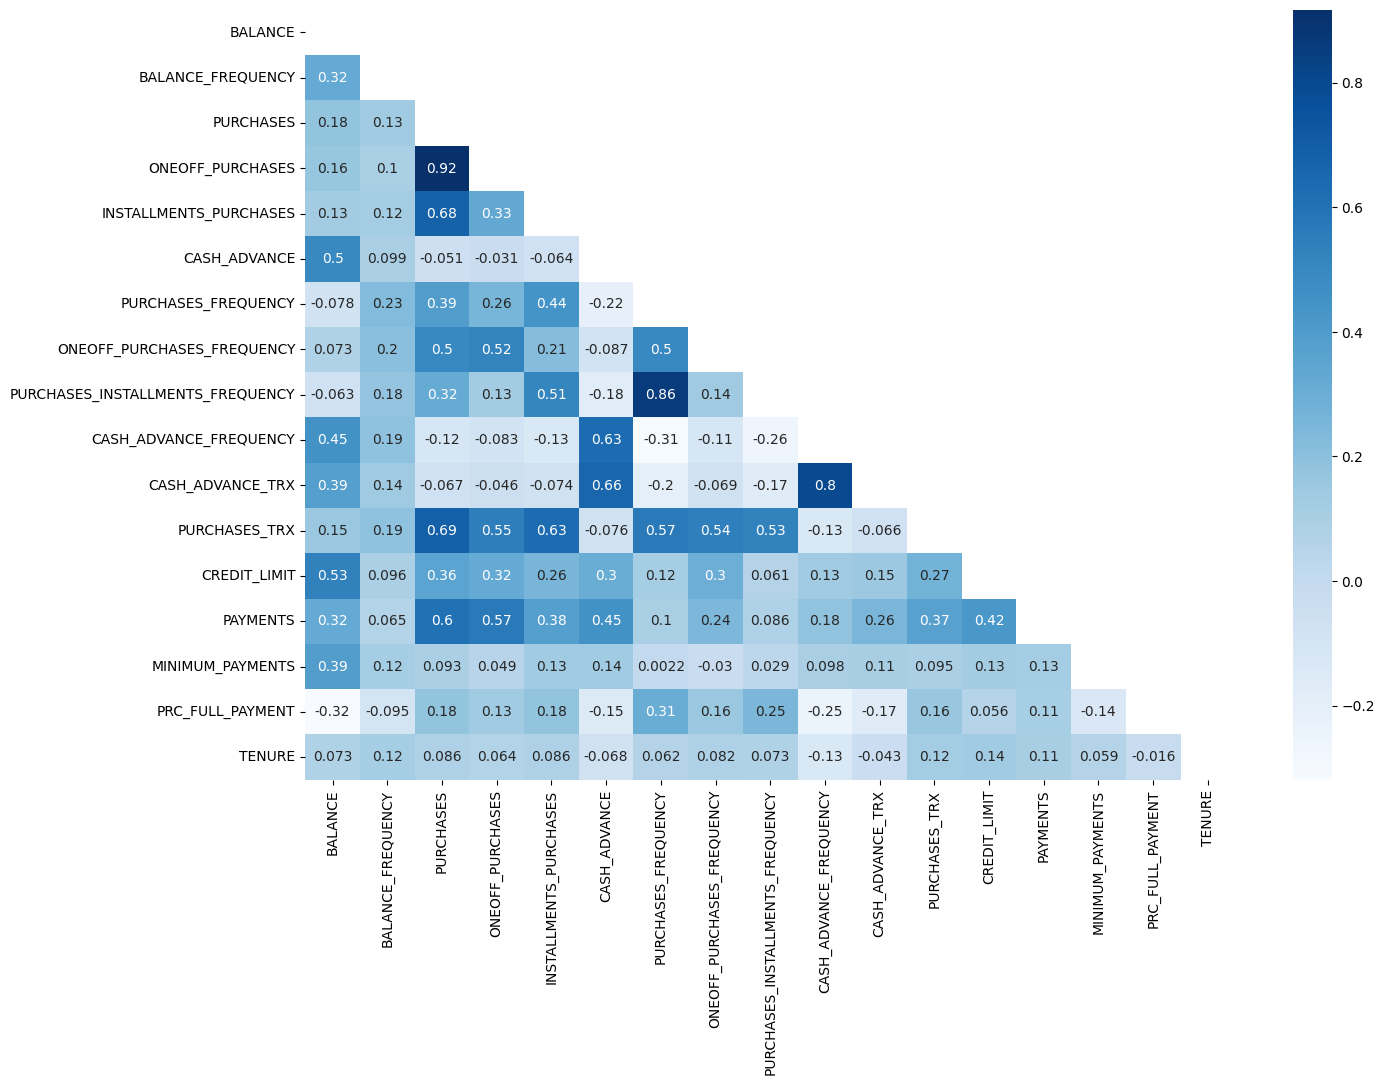

In [14]:
plt.figure(figsize=(15,10))
mask_ = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap( data.corr(), annot=True, cmap='Blues', mask=mask_)

Както можем да видим от горния heatmap, има  колони,които  сериозно си корелират,например - **PURCHASES** и **ONEOFF_PURCHASES**,**PURCHASES_FREQUENCY** и **PURCHASES_INSTALLMENT_FREQUENCY**,**CASH_ADVANCE_FREQUENCY** и **CASH_ADVANCE_TRX** има и такива, чиито индекс на корелация е точно на границата ~ 0.7

**3.Кратко описание на алгоритмите, които ще използваме**

Ще използваме 3 алгоритъма,за да клъстеризираме dataset-a,като преди това намалим размерността на данните,използвайки PCA(Principal component Analysis)</br>
1. **Kmeans** - Тъй като нямаме брой клъстери, а алгоритъмът **Kmeans** очаква брой клъстери като параметър,ще използваме методът на лакътя за да определим за кое к, алгоритъмът работи най-добре.
2. **DBSCAN** - За този алгоритъм ще трябва да определим подходящо **eps**,като за целта ще използваме sillhouete_score метриката.
3. **Agglomerative Clustering** - За този алгоритъм ще определим оптималния номер на клъстерите използвайки дендограма.
Представянето на всеки един от трите алгоритъма ще се оценява по три метрики - **Davis-Bouldin Index**,**Silhouette Score** и **Calinski-Harabasz Index**

**4.Библиотеки и технологии**

За целта на проекта ще използваме **Python** и **Jupyter**</br>
Бибилотеките,които смятаме да използваме в проекта са
- numpy
- matplotlib
- pandas
- seaborn
- sklearn
- scipy
- yellowbrick
- plotly